<a href="https://colab.research.google.com/github/anandmpandit/LSTM_Example/blob/main/ADANIEnterprises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
#Description : This program uses Artificial neural network called LSTM (Long Short Term Memory) to predict closing stock price of a company
#              AAPL using last 60 days stock price
#Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from matplotlib import style
import datetime as dt
plt.style.use('fivethirtyeight')
plt.show()


In [118]:
#Get the yahoo finance libraries
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [119]:
import yfinance as yf
df = yf.download('ADANIENT.NS',start='2007-01-01', end='2023-03-17')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-02,17.626631,18.028978,17.511675,17.760748,14.256759,2117578
2007-01-03,17.933182,18.117111,17.285595,17.653454,14.170631,3567325
2007-01-04,17.737757,17.875704,17.373728,17.423542,13.986080,2319803
2007-01-05,17.481020,18.239731,17.320082,18.074961,14.508980,7521602
2007-01-08,18.009819,18.239731,17.718596,17.848881,14.327505,4855140
...,...,...,...,...,...,...
2023-03-10,1870.000000,1940.000000,1820.599976,1896.199951,1896.199951,9419942
2023-03-13,1917.000000,1985.000000,1857.400024,1874.400024,1874.400024,7572604
2023-03-14,1874.000000,1874.849976,1651.349976,1738.199951,1738.199951,12679663


In [120]:
df.shape

(3998, 6)

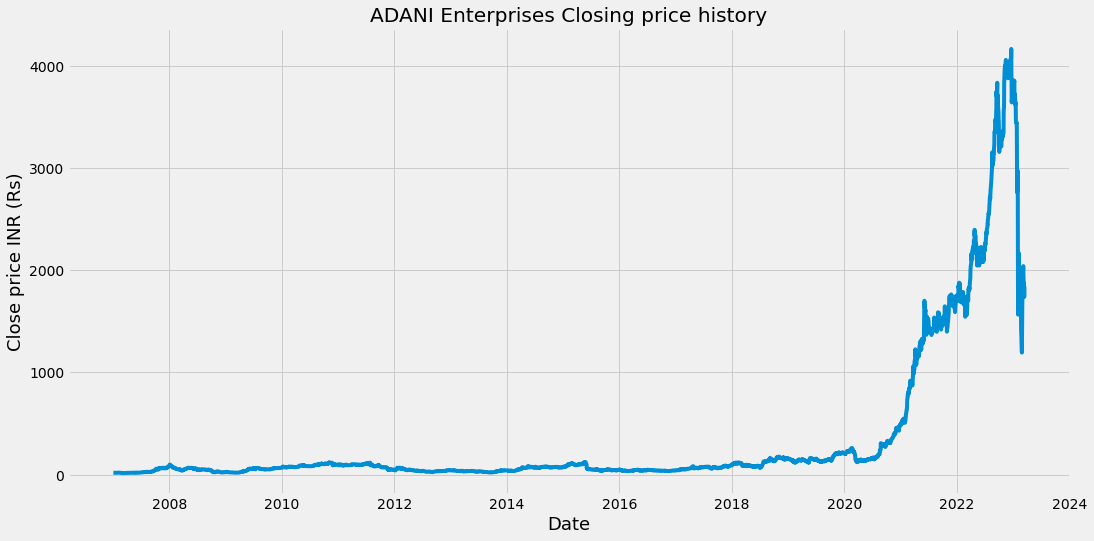

In [121]:
#Visualize closing price history

plt.figure(figsize=(16,8))
plt.title('ADANI Enterprises Closing price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price INR (Rs)',fontsize=18)
plt.show()

In [122]:
#Create new data frame with only the close price column
data = df.filter(['Close'])
print(data)

#Convert the dataframe to a numpy array
dataset = data.values

print(dataset)

#Get no of rows to train the model 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

                  Close
Date                   
2007-01-02    17.760748
2007-01-03    17.653454
2007-01-04    17.423542
2007-01-05    18.074961
2007-01-08    17.848881
...                 ...
2023-03-10  1896.199951
2023-03-13  1874.400024
2023-03-14  1738.199951
2023-03-15  1839.000000
2023-03-16  1843.800049

[3998 rows x 1 columns]
[[  17.76074791]
 [  17.65345383]
 [  17.42354202]
 ...
 [1738.19995117]
 [1839.        ]
 [1843.80004883]]


3199

In [123]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data 

array([[0.00084004],
       [0.00081419],
       [0.0007588 ],
       ...,
       [0.41530123],
       [0.43958439],
       [0.44074074]])

In [124]:
#Create training dataset
#Create scaled training dataset
train_data = scaled_data[0:training_data_len,:]

print(train_data)
#Split the dataset x_train and y_train datasets
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()


[[0.00084004]
 [0.00081419]
 [0.0007588 ]
 ...
 [0.04693448]
 [0.04682607]
 [0.04675381]]
[array([8.40035450e-04, 8.14187845e-04, 7.58801104e-04, 9.15730662e-04,
       8.61267034e-04, 7.08029925e-04, 6.25872467e-04, 6.77566758e-04,
       7.18183701e-04, 7.42185082e-04, 6.72951197e-04, 7.91110036e-04,
       7.56031767e-04, 6.66489410e-04, 6.71104972e-04, 6.11102669e-04,
       6.28641804e-04, 6.70181859e-04, 6.48950276e-04, 8.16034069e-04,
       9.44347145e-04, 9.85887200e-04, 9.86810313e-04, 1.20466574e-03,
       1.00434991e-03, 9.42500920e-04, 7.25569060e-04, 4.38480202e-04,
       5.29868324e-04, 7.72647789e-04, 7.48646868e-04, 6.55412062e-04,
       5.88947973e-04, 5.64947052e-04, 5.86178636e-04, 4.94790055e-04,
       5.13252301e-04, 4.80020257e-04, 4.47710866e-04, 4.20940608e-04,
       3.67400092e-04, 1.37544429e-04, 5.53890381e-06, 0.00000000e+00,
       1.26466851e-04, 1.16312615e-04, 1.92931399e-04, 2.26163443e-04,
       1.08004604e-04, 1.41236648e-04, 1.39390653e-04, 1.

In [125]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

print (x_train)
print (y_train)

x_train.shape

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[[0.00084004 0.00081419 0.0007588  ... 0.00026678 0.00038955 0.0004394 ]
 [0.00081419 0.0007588  0.00091573 ... 0.00038955 0.0004394  0.00034248]
 [0.0007588  0.00091573 0.00086127 ... 0.0004394  0.00034248 0.00038125]
 ...
 [0.03256454 0.03169729 0.0311673  ... 0.04824741 0.04694653 0.04689835]
 [0.03169729 0.0311673  0.03114321 ... 0.04694653 0.04689835 0.04693448]
 [0.0311673  0.03114321 0.030288   ... 0.04689835 0.04693448 0.04682607]]
[0.00034248 0.00038125 0.00045602 ... 0.04693448 0.04682607 0.04675381]


(3139, 60, 1)

In [126]:
#Build the model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [127]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [128]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=1,verbose="auto")

3139/3139 [==============================] - 168s 52ms/step - loss: 1.0662e-05


In [129]:
#Create a test data set
#Create a new array containing scaled values from index 3262 to 4077
print(training_data_len)
test_data = scaled_data[training_data_len - 60:,:]


#Create data sets x_test and y_test
x_test =[]
y_test =dataset[training_data_len:,:]

for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])



#Convert data to a numpy array
x_test = np.array(x_test)


#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1],1))


3199


In [130]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

25/25 [==============================] - 2s 35ms/step


In [131]:
#Get the root mean sqaured error (RMSE) for the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse


317.6589804888671

In [132]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]

print(valid)
#valid['predictions'] = predictions
valid.loc[:,('predictions')] = predictions
print(valid)


                  Close
Date                   
2020-01-01   207.850006
2020-01-02   211.199997
2020-01-03   208.300003
2020-01-06   199.550003
2020-01-07   204.050003
...                 ...
2023-03-10  1896.199951
2023-03-13  1874.400024
2023-03-14  1738.199951
2023-03-15  1839.000000
2023-03-16  1843.800049

[799 rows x 1 columns]
                  Close  predictions
Date                                
2020-01-01   207.850006   184.953110
2020-01-02   211.199997   184.421463
2020-01-03   208.300003   184.682892
2020-01-06   199.550003   184.653305
2020-01-07   204.050003   182.878586
...                 ...          ...
2023-03-10  1896.199951  1638.165894
2023-03-13  1874.400024  1663.867920
2023-03-14  1738.199951  1662.944824
2023-03-15  1839.000000  1626.436157
2023-03-16  1843.800049  1600.785889

[799 rows x 2 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

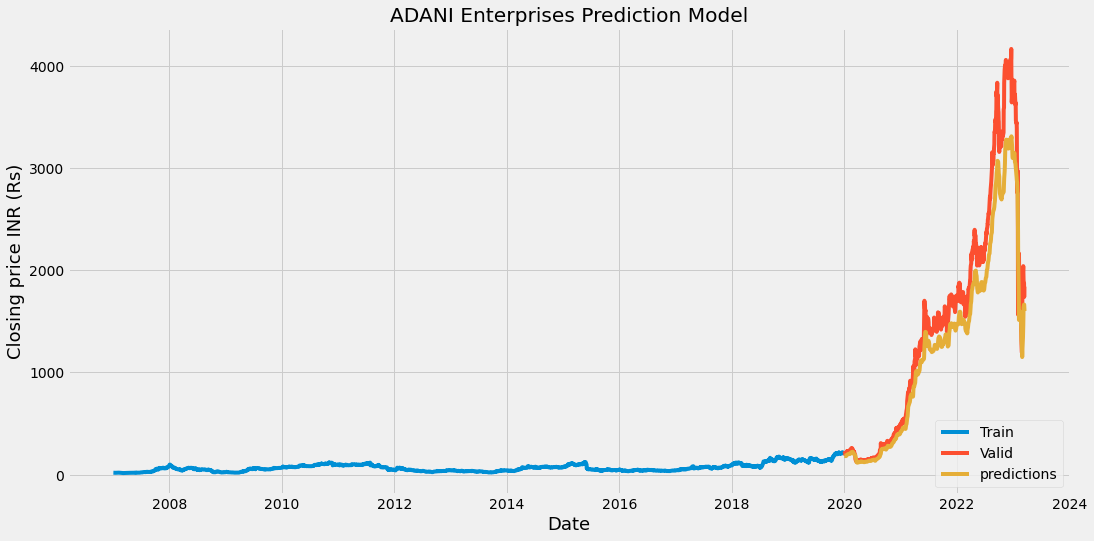

In [133]:

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('ADANI Enterprises Prediction Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price INR (Rs)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train','Valid','predictions'], loc='lower right')
plt.show

In [134]:
#Show valid(Actual) and predicted stock prices 
valid


,Close,predictions
Date,,
2020-01-01,207.850006,184.953110
2020-01-02,211.199997,184.421463
2020-01-03,208.300003,184.682892
2020-01-06,199.550003,184.653305
2020-01-07,204.050003,182.878586
...,...,...
2023-03-10,1896.199951,1638.165894
2023-03-13,1874.400024,1663.867920
2023-03-14,1738.199951,1662.944824


In [151]:
#Get the quote
adanient_quote = yf.download('ADANIENT.NS',start='2007-01-01', end='2023-03-17')
#Create new data frame
new_df = adanient_quote.filter(['Close'])
#Get the last  days closing price values and convert them into array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

[*********************100%***********************]  1 of 1 completed


In [152]:
#Create an empty list
X_test = []
#Append past 60 days data
X_test.append(last_60_days_scaled)

In [153]:
#Convert the X_Test dataset to numpy array 
X_test=np.array(X_test)

In [154]:
#Reshape the 2D data into 3D array
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [163]:
#Get the predicted scaled price
pred_price = model.predict(X_test,verbose='auto')


1/1 [==============================] - 0s 34ms/step


In [164]:
#Undo Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[1585.1724]]


In [149]:
#Get the root mean sqaured error (RMSE) for the model
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

317.6589804888671

In [150]:
#Get the quote
adanient_quote2 = yf.download('ADANIENT.NS',start='2023-03-16', end='2023-03-18')
print(adanient_quote2)

[*********************100%***********************]  1 of 1 completed
              Open         High     Low        Close    Adj Close   Volume
Date                                                                      
2023-03-16  1861.0  1875.000000  1795.0  1843.800049  1843.800049  6509495
2023-03-17  1901.0  1918.849976  1845.0  1876.550049  1876.550049  5964875
